In [16]:
## import libraries
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import get_file
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# # URL of the dataset zip file
# url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

# # Download and extract the dataset
# dataset_path = get_file("horse-or-human.zip", origin=url, extract=True)

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
train_dir = os.getenv("DATASET_TRAIN_DIR_HORSE_OR_HUMAN")
validation_dir = os.getenv("DATASET_VALIDATION_DIR_HORSE_OR_HUMAN")

In [4]:
train_horse_names = os.listdir(os.path.join(train_dir,"horses"))
print(train_horse_names[:10])

train_human_names = os.listdir(os.path.join(train_dir,"humans"))
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [5]:
print('Total training horse images :', len(train_horse_names))
print('Total training human images :', len(train_human_names))

Total training horse images : 500
Total training human images : 527


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

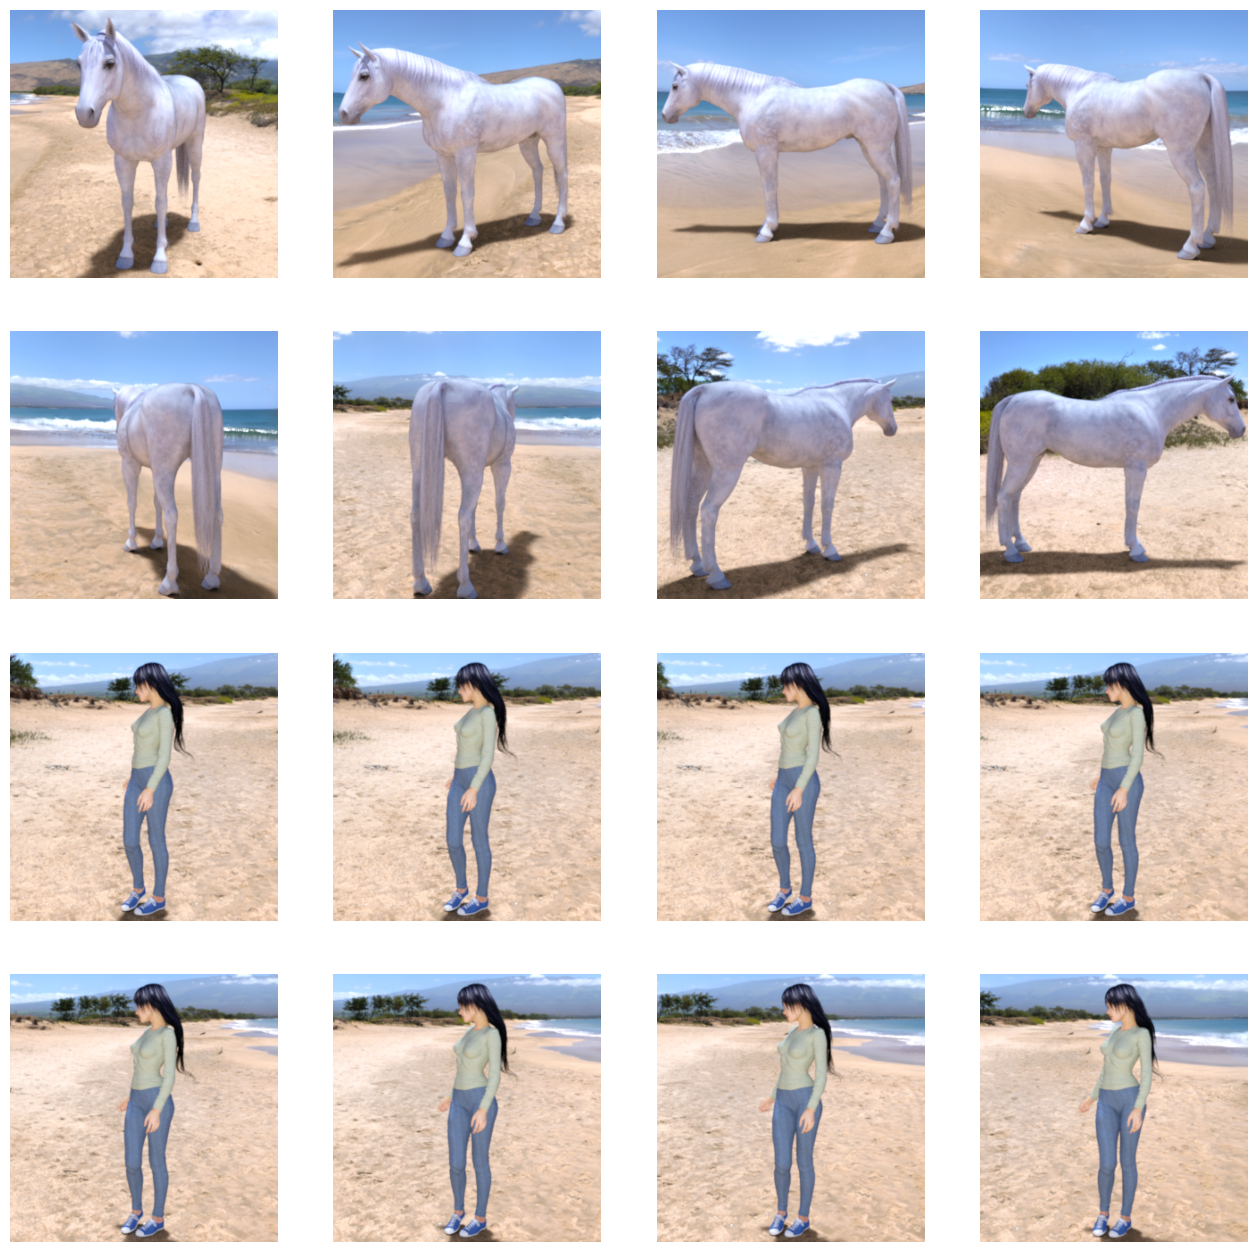

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(os.path.join(train_dir,"horses"), fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(os.path.join(train_dir,"humans"), fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
# Auto Image
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size= (300, 300),
#     batch_size= 128,
#     class_mode= 'binary'
# )

# validation_generator = train_datagen.flow_from_directory(
#     validation_dir,
#     target_size= (300, 300),
#     batch_size= 32,
#     class_mode= 'binary'
# )

In [9]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics= ['accuracy'])

In [12]:
# Auto Image
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (300, 300),
    batch_size= 128,
    class_mode= 'binary'
)

Found 1027 images belonging to 2 classes.


In [13]:
model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs= 15,
    verbose= 1
)

Epoch 1/15


8/8 [==============================] - 37s 5s/step - loss: 0.7408 - accuracy: 0.5139
Epoch 2/15
8/8 [==============================] - 29s 4s/step - loss: 0.6350 - accuracy: 0.6919
Epoch 3/15
8/8 [==============================] - 25s 3s/step - loss: 1.0929 - accuracy: 0.7553
Epoch 4/15
8/8 [==============================] - 24s 3s/step - loss: 0.5063 - accuracy: 0.8009
Epoch 5/15
8/8 [==============================] - 24s 3s/step - loss: 0.6311 - accuracy: 0.8053
Epoch 6/15
8/8 [==============================] - 24s 3s/step - loss: 0.2635 - accuracy: 0.9043
Epoch 7/15
8/8 [==============================] - 25s 3s/step - loss: 0.2041 - accuracy: 0.9199
Epoch 8/15
8/8 [==============================] - 25s 4s/step - loss: 0.2143 - accuracy: 0.9043
Epoch 9/15
8/8 [==============================] - 26s 3s/step - loss: 0.1066 - accuracy: 0.9644
Epoch 10/15
8/8 [==============================] - 24s 3s/step - loss: 0.1159 - accuracy: 0.9677
Epoch 11/15
8/8 [====================

In [31]:
path = "./data/keefikus-t3b5i6gibHo-unsplash.jpg"
img = image.load_img(path, target_size= (300, 300))
X = image.img_to_array(img)
X /= 255.0
X = np.expand_dims(X, axis= 0)

images = np.vstack([X])
classes = model.predict(images, batch_size=10)
print(classes[0], "Human" if classes[0] > 0.5 else "Horses")

1/1 [==============================] - 0s 43ms/step
[0.99986476] Human


### Visualizing Intermediate Results

1/1 [==============================] - 0s 288ms/step


C:\Users\ei12078\AppData\Local\Temp\ipykernel_7348\1733768448.py:29: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\ei12078\AppData\Local\Temp\ipykernel_7348\1733768448.py:32: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


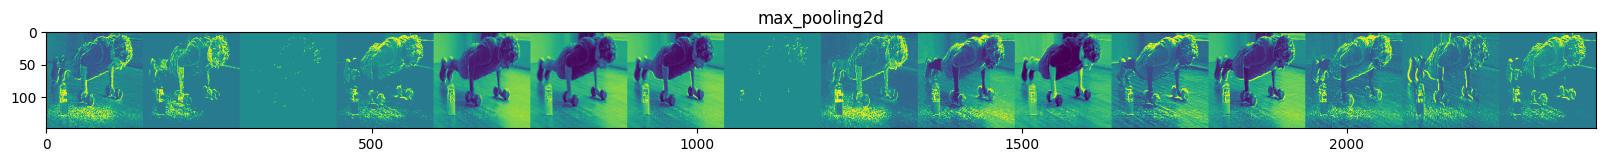

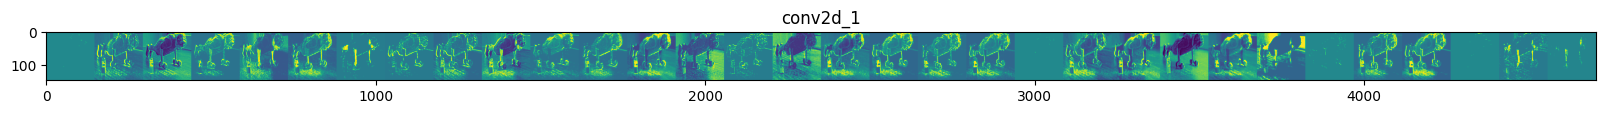

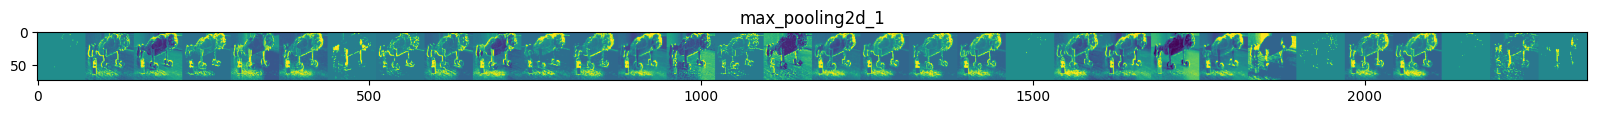

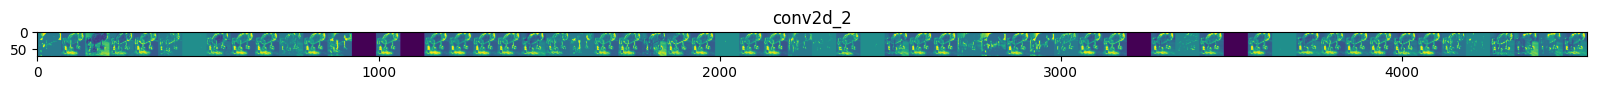

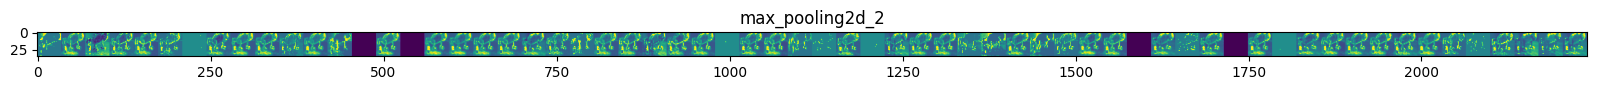

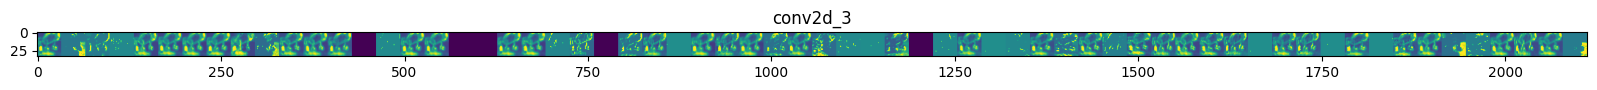

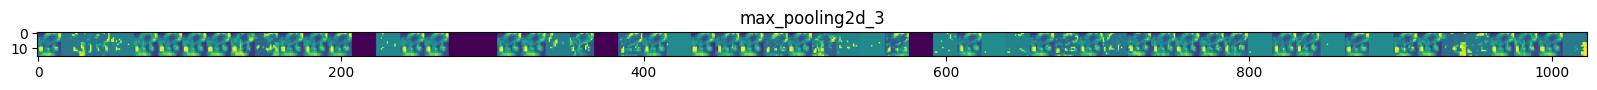

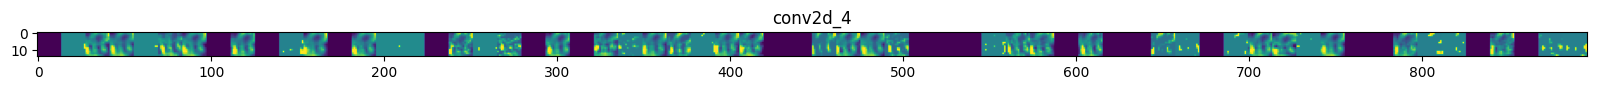

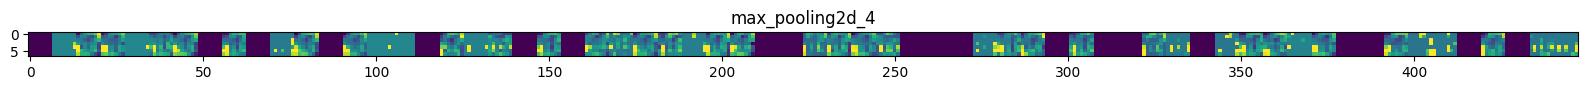

In [40]:
import random

img_path = "./data/boxed-water-is-better-P4AIjQw1BuY-unsplash.jpg"

successive_outputs = [layer.output for layer in model.layers[1:]]
visulization_model = keras.models.Model(inputs= model.input, outputs= successive_outputs)

horse_img_files = [os.path.join(os.path.join(train_dir,"horses"), f) for f in train_horse_names]
human_img_files = [os.path.join(os.path.join(train_dir,"humans"), f) for f in train_human_names]

img = image.load_img(img_path, target_size= (300,300))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
X /= 255

successive_feature_maps = visulization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]

        display_grid = np.zeros((size, size*n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size:(i+1)*size] = x

        scale = 20. / n_features
        plt.figure(figsize=((scale*n_features, scale)))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [41]:
validation_horse_names = os.listdir(os.path.join(validation_dir,"horses"))
print(train_horse_names[:10])

validation_human_names = os.listdir(os.path.join(validation_dir,"humans"))
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [42]:
print('Total training horse images :', len(validation_horse_names))
print('Total training human images :', len(validation_human_names))

Total training horse images : 128
Total training human images : 128


In [43]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size= (300, 300),
    batch_size= 32,
    class_mode= 'binary'
)

Found 256 images belonging to 2 classes.


In [44]:
model_with_validation = model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs= 15,
    validation_data= validation_generator,
    validation_steps= 8
)

Epoch 1/15
8/8 [==============================] - 39s 4s/step - loss: 2.4017 - accuracy: 0.9066 - val_loss: 1.1383 - val_accuracy: 0.8164
Epoch 2/15
8/8 [==============================] - 28s 3s/step - loss: 0.0205 - accuracy: 0.9967 - val_loss: 1.4340 - val_accuracy: 0.8203
Epoch 3/15
8/8 [==============================] - 27s 4s/step - loss: 0.0133 - accuracy: 0.9978 - val_loss: 1.4992 - val_accuracy: 0.8398
Epoch 4/15
8/8 [==============================] - 30s 4s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.9529 - val_accuracy: 0.8164
Epoch 5/15
8/8 [==============================] - 27s 3s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.2059 - val_accuracy: 0.8164
Epoch 6/15
8/8 [==============================] - 27s 3s/step - loss: 0.0827 - accuracy: 0.9766 - val_loss: 0.3338 - val_accuracy: 0.9102
Epoch 7/15
8/8 [==============================] - 29s 4s/step - loss: 0.0532 - accuracy: 0.9811 - val_loss: 1.5417 - val_accuracy: 0.8633
Epoch 8/15
8/8 [==================

In [46]:
path = "./data/boxed-water-is-better-P4AIjQw1BuY-unsplash.jpg"
img = image.load_img(path, target_size= (300, 300))
X = image.img_to_array(img)
X /= 255.0
X = np.expand_dims(X, axis= 0)

images = np.vstack([X])
classes = model.predict(images, batch_size=10)
print(classes[0], "Human" if classes[0] > 0.5 else "Horse")

1/1 [==============================] - 0s 65ms/step
[6.3179384e-12] Horses


## Reduced image size

In [47]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 64)       

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics= ['accuracy'])

In [50]:
# Auto Image
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150, 150),
    batch_size= 128,
    class_mode= 'binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size= (150, 150),
    batch_size= 32,
    class_mode= 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [51]:
model_with_validation = model.fit(
    train_generator,
    steps_per_epoch= 8,
    epochs= 15,
    validation_data= validation_generator,
    validation_steps= 8,
    verbose= 1
)

Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 1.8545 - accuracy: 0.5039 - val_loss: 1.5348 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 0.7143 - accuracy: 0.6785 - val_loss: 0.6066 - val_accuracy: 0.7422
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.5774 - accuracy: 0.7486 - val_loss: 0.6802 - val_accuracy: 0.6211
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.9077 - accuracy: 0.7675 - val_loss: 0.5407 - val_accuracy: 0.7578
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.4500 - accuracy: 0.7987 - val_loss: 0.7931 - val_accuracy: 0.6484
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.1919 - accuracy: 0.9288 - val_loss: 1.0462 - val_accuracy: 0.7305
Epoch 7/15
8/8 [==============================] - 18s 2s/step - loss: 0.2498 - accuracy: 0.9004 - val_loss: 0.3816 - val_accuracy: 0.8477
Epoch 8/15
8/8 [==================